<a href="https://colab.research.google.com/github/alek00sandra/uczenie_maszynowe/blob/main/regularyacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from statsmodels import robust
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
n_samples = 500
n_outliners = 50
X,y, coef = datasets.make_regression(n_samples = n_samples, n_features = 1, n_informative = 1, noise = 10, coef = True, random_state = 0)

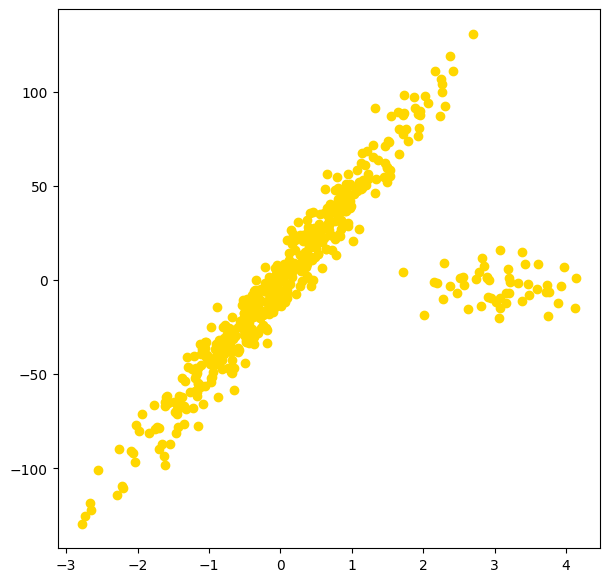

In [ ]:
np.random.seed(0)
X[:n_outliners] = 3 + 0.5*np.random.normal(size=(n_outliners,1))
y[:n_outliners] = -3 + 10*np.random.normal(size = n_outliners)

plt.figure(figsize = (7,7))
plt.scatter(X,y,color = 'gold')
plt.show()

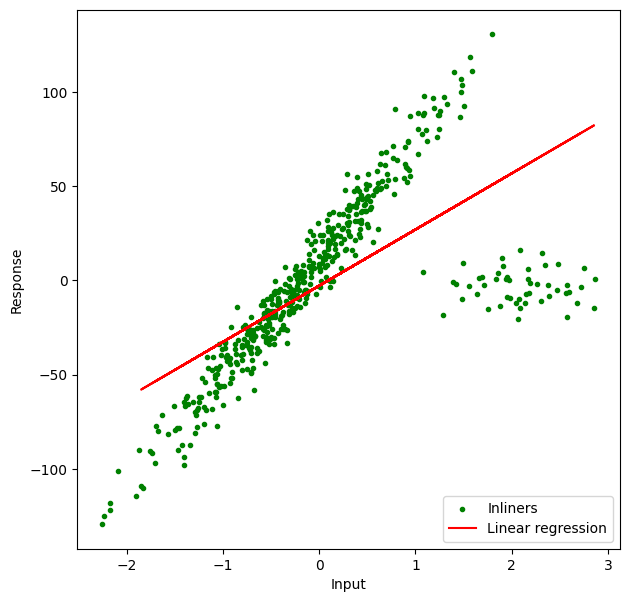

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

line_X = np.arange(X.min(), X.max())[:,np.newaxis]

plt.figure(figsize = (7,7))
plt.scatter(X[:], y[:], color = 'green',
            marker = '.', label = 'Inliners')
plt.plot(X_test,y_pred, color = 'red', label = "Linear regression")


plt.legend(loc = 'lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()






In [ ]:
ransac = linear_model.RANSACRegressor(
    base_estimator = LinearRegression(),
    min_samples = 0.7,
    residual_threshold = robust.mad(y),
    max_trials = 100)


ransac.fit(X_train,y_train)
inlier_mask = ransac.inlier_mask_

print(lr.coef_,ransac.estimator_.coef_)

[29.82952619] [58.39983322]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


In [ ]:
linear = LinearRegression()
liner.fit(X_train,y_train)

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)


ridge = Ridge(alpha = 0.1)
rifge.fit(X_train, y_train)

elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic.fit(X_train,y_train)

